In [1]:
import re
import matplotlib.pyplot as plt
import string
from collections import Counter
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import pickle
import warnings
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

C:\Users\Shajith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shajith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shajith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shajith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
tr = pd.read_csv('OutputSentiment_levi1a.csv', encoding='mac_roman')
tr=tr.astype(str)

In [3]:
tr.groupby('Sentiment').nunique()

,id,comment,Polarity
Sentiment,,,
Negative,240,22257,3910
Neutral,240,29102,1
Positive,240,35280,5791
Very Negative,237,2320,139
Very Positive,240,7730,157


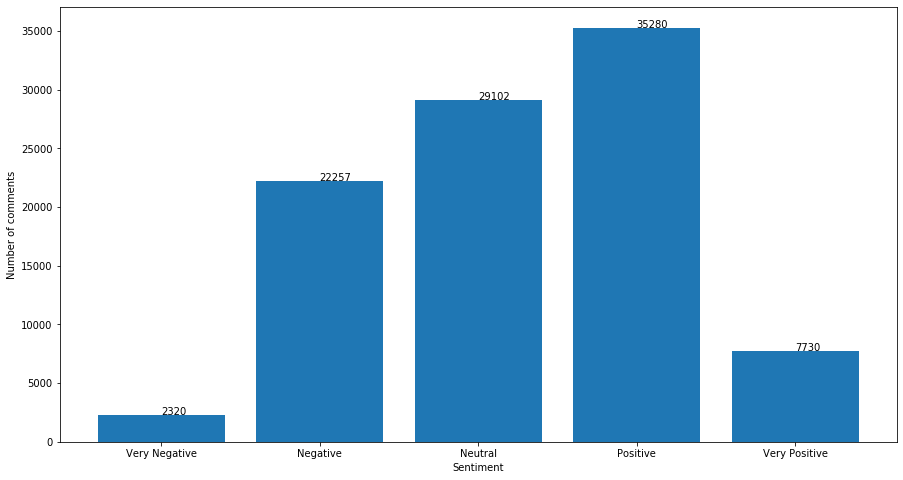

In [4]:
lis1a = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
lis2a = [2320, 22257, 29102, 35280, 7730]

x = lis1a
y = lis2a

f1 = plt.figure()
f1.set_figwidth(15)
f1.set_figheight(8)
  
plt.xlabel('Sentiment')
plt.ylabel('Number of comments')
for a,b in zip(lis1a, lis2a): 
    plt.text(a, b, str(round(b,3)))

plt.bar(x, y)
plt.show()

In [5]:
tr = tr[['comment','Sentiment']]
tr.head()
tr["comment"].fillna("No content", inplace = True)

In [6]:
temp = []
#Splitting pd.Series to list
dt_list = tr['comment'].values.tolist()
for i in range(len(dt_list)):
    temp.append(dt_list[i])
list(temp[:5])

['everybody i talk area   whatever   camp   infuriates   yeah   whatever get   visit parents   grandparents   coworkers   get infected spreads  ',
 'people going get   avoid   helps tremendously   this is awesome help explain children teens   especially   thank   ',
 'i   feeling hot today   i weird dry cough   little sluggish otherwise feel fine   i work it cloud engineer i asked boss i could telework today   the response i use sick day come work   it   probably nothing   i worried i   want spread anything   i stayed home today i guess i tomorrow   my boss   take serious many people   so i resigned point  ',
 'see rest article infectious disease expert   dr   siouxsie wiles      phd oxford       ',
 'considering number icu beds   flatten peak save lives   lot lives  ']

In [7]:
import gensim

In [8]:
def sent_to_words(sentences):
    for x in sentences:
        yield(gensim.utils.simple_preprocess(str(x), deacc=True))
        

words = list(sent_to_words(temp))

print(words[:10])

[['everybody', 'talk', 'area', 'whatever', 'camp', 'infuriates', 'yeah', 'whatever', 'get', 'visit', 'parents', 'grandparents', 'coworkers', 'get', 'infected', 'spreads'], ['people', 'going', 'get', 'avoid', 'helps', 'tremendously', 'this', 'is', 'awesome', 'help', 'explain', 'children', 'teens', 'especially', 'thank'], ['feeling', 'hot', 'today', 'weird', 'dry', 'cough', 'little', 'sluggish', 'otherwise', 'feel', 'fine', 'work', 'it', 'cloud', 'engineer', 'asked', 'boss', 'could', 'telework', 'today', 'the', 'response', 'use', 'sick', 'day', 'come', 'work', 'it', 'probably', 'nothing', 'worried', 'want', 'spread', 'anything', 'stayed', 'home', 'today', 'guess', 'tomorrow', 'my', 'boss', 'take', 'serious', 'many', 'people', 'so', 'resigned', 'point'], ['see', 'rest', 'article', 'infectious', 'disease', 'expert', 'dr', 'siouxsie', 'wiles', 'phd', 'oxford'], ['considering', 'number', 'icu', 'beds', 'flatten', 'peak', 'save', 'lives', 'lot', 'lives'], ['meanwhile', 'sacramento', 'county',

In [9]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [10]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [11]:
data = []
for i in range(len(words)):
    data.append(detokenize(words[i]))
print(data[:5])

['everybody talk area whatever camp infuriates yeah whatever get visit parents grandparents coworkers get infected spreads', 'people going get avoid helps tremendously this is awesome help explain children teens especially thank', 'feeling hot today weird dry cough little sluggish otherwise feel fine work it cloud engineer asked boss could telework today the response use sick day come work it probably nothing worried want spread anything stayed home today guess tomorrow my boss take serious many people so resigned point', 'see rest article infectious disease expert dr siouxsie wiles phd oxford', 'considering number icu beds flatten peak save lives lot lives']


In [12]:
data = np.array(data)

In [13]:
labels = np.array(tr['Sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(-1)
    if labels[i] == 'Positive':
        y.append(1)
    if labels[i] == 'Very Positive':
        y.append(2)
    if labels[i] == 'Very Negative':
        y.append(-2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 5, dtype="float32")
del y

In [14]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    5   88 1384]
 [   0    0    0 ...  534  328  178]
 [   0    0    0 ...    1   50   95]
 ...
 [   0    0    0 ... 1028  265    8]
 [   0    0    0 ... 4132  800   98]
 [   0    0    0 ...   92 2857 1499]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

74976 24992 74976 24992


In [16]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.25, return_sequences=True))
model1.add(Dropout(0.4))
model1.add(layers.LSTM(5,dropout=0.25))
model1.add(Dropout(0.4))
model1.add(layers.Dense(5,activation='softmax'))

In [17]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint1])


Train on 74976 samples, validate on 24992 samples
Epoch 1/10
74976/74976 [==============================] - 310s 4ms/step - loss: 1.0826 - accuracy: 0.5692 - val_loss: 0.8278 - val_accuracy: 0.6384

Epoch 00001: val_accuracy improved from -inf to 0.63840, saving model to best_model1.hdf5
Epoch 2/10
74976/74976 [==============================] - 313s 4ms/step - loss: 0.8323 - accuracy: 0.6631 - val_loss: 0.6613 - val_accuracy: 0.7743

Epoch 00002: val_accuracy improved from 0.63840 to 0.77433, saving model to best_model1.hdf5
Epoch 3/10
74976/74976 [==============================] - 757s 10ms/step - loss: 0.7395 - accuracy: 0.7132 - val_loss: 0.5748 - val_accuracy: 0.8087

Epoch 00003: val_accuracy improved from 0.77433 to 0.80870, saving model to best_model1.hdf5
Epoch 4/10
74976/74976 [==============================] - 380s 5ms/step - loss: 0.6958 - accuracy: 0.7338 - val_loss: 0.5249 - val_accuracy: 0.8207

Epoch 00004: val_accuracy improved from 0.80870 to 0.82070, saving model to 

In [18]:
best_model = keras.models.load_model("best_model1.hdf5")

In [19]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

Model accuracy:  0.8717189431190491


In [20]:
predictions = best_model.predict(X_test)

In [21]:
sentiment = ['Neutral','Very Positive','Positive','Very Negative','Negative']

In [23]:
sequence = tokenizer.texts_to_sequences(['It is a really good thing to hear as nearly 100 crore vaccinations have been completed successfully.'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Very Positive'

In [25]:
sequence = tokenizer.texts_to_sequences(['It is extremely scary and devastating to hear about of deaths caused by covid everyday'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [44]:
sequence = tokenizer.texts_to_sequences(['No more Covid restrictions in MP for now'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [46]:
sequence = tokenizer.texts_to_sequences(['The virus can spread from an infected persons'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

In [26]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [27]:
data = pd.read_csv('OutputSentiment_levi2a.csv')
data["comment"].fillna("No content", inplace = True)
labels = data['Sentiment']
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(-1)
    if labels[i] == 'Positive':
        y.append(1)
    if labels[i] == 'Very Negative':
        y.append(-2)
    if labels[i] == 'Very Positive':
        y.append(2)
data['Sentiment'] = y
data.head()

,Unnamed: 0,comment,Sentiment
0,0,everybody talk area whatever camp infuriates y...,0
1,1,people going get avoid helps tremendously this...,1
2,2,feeling hot today weird dry cough little slugg...,-1
3,3,see rest article infectious disease expert dr ...,0
4,4,considering number icu beds flatten peak save ...,0


In [28]:
X = data.comment
y = data.Sentiment

In [29]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)
#Using training data to transform text into counts of features for each message
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)

In [30]:
NB = MultinomialNB()
NB.fit(X_train_dtm, y_train)
y_pred = NB.predict(X_test_dtm)
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')



Naive Bayes
Accuracy Score: 67.99039711913574%
Confusion Matrix: 
[[  42  376   25   17    1]
 [  30 3151  246 1040   56]
 [  15  352 4087 1675   68]
 [  11  896  368 5623  255]
 [   2  171  132  664  691]]


In [31]:
LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Logistic Regression
Accuracy Score: 84.04521356406921%
Confusion Matrix: 
[[ 262  172   26    0    1]
 [  89 3526  269  586   53]
 [   1   78 5974  124   20]
 [  10  517  383 5997  246]
 [   6  112  190  307 1045]]


C:\Users\Shajith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


Support Vector Machine
Accuracy Score: 81.259377813344%
Confusion Matrix: 
[[ 259  186   11    1    4]
 [  98 3351  298  706   70]
 [   3  116 5864  161   53]
 [  14  650  425 5787  277]
 [   6  125  177  366  986]]


C:\Users\Shajith\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train_dtm, y_train)
y_pred = KNN.predict(X_test_dtm)
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


K Nearest Neighbors (NN = 3)
Accuracy Score: 48.32449734920476%
Confusion Matrix: 
[[ 184   16  251    5    5]
 [ 343 1180 2556  318  126]
 [   5   64 6074   29   25]
 [  90  676 4358 1496  533]
 [   9   28  868   27  728]]


C:\Users\Shajith\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


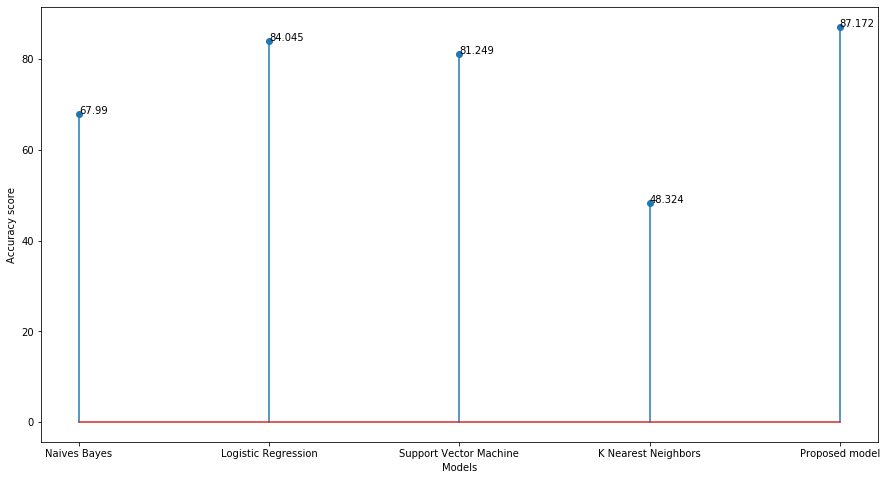

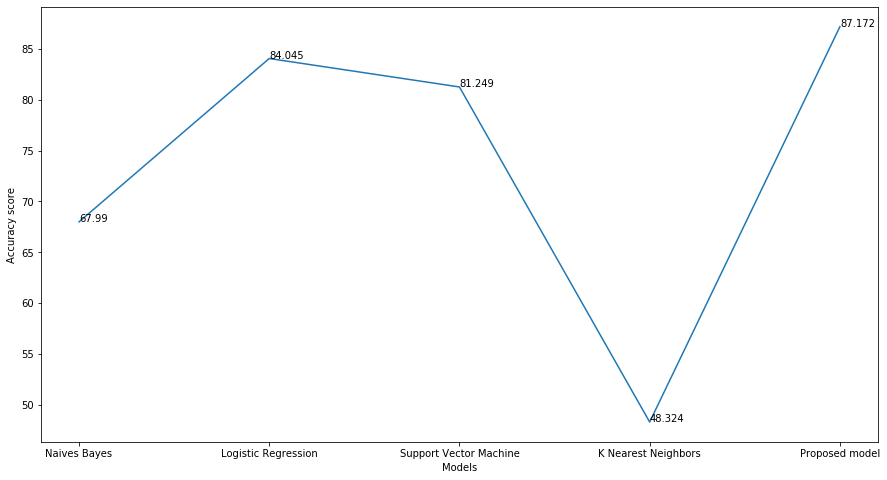

In [35]:
lis1 = ['Naives Bayes', 'Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors', 'Proposed model']
lis2 = [67.99039711913574 , 84.04521356406921 , 81.24937481244373 , 48.32449734920476 , 87.172]
import matplotlib.pyplot as plt
import numpy as np
  
x = lis1
y = lis2

f1 = plt.figure()
f1.set_figwidth(15)
f1.set_figheight(8)
  
plt.xlabel('Models')
plt.ylabel('Accuracy score')
for a,b in zip(lis1, lis2): 
    plt.text(a, b, str(round(b,3)))

plt.stem(x, y)
plt.show()

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(8)
  
plt.xlabel('Models')
plt.ylabel('Accuracy score')
for a,b in zip(lis1, lis2): 
    plt.text(a, b, str(round(b,3)))

plt.plot(x, y)
plt.show()